In [ ]:
# 1. 데이터 불러오기
# 2. 데이터 전처리 (정규화 포함)
# 3. 학습/테스트 분리
# 4. 텐서 변환 & DataLoader 구성
# 5. 딥러닝 회귀 모델 정의
# 6. 모델 학습 루프
# 7. 성능 평가 (MSE, R2 Score)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("boston.csv", index_col=0)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


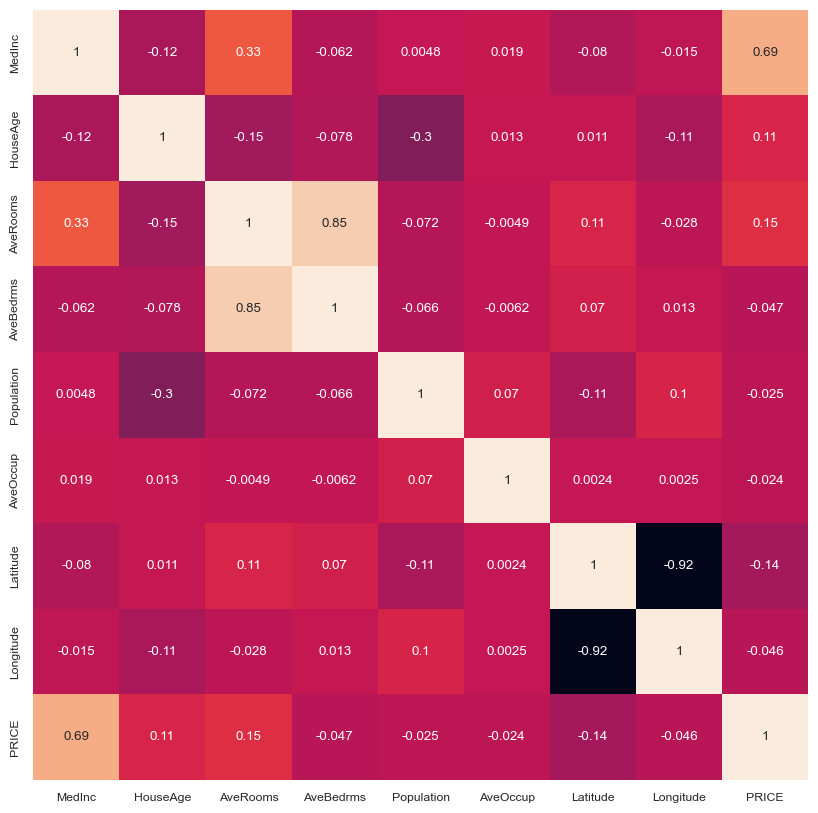

In [7]:
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# PRICE와 높은 건  MedInc

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
X = df.drop('PRICE',axis=1)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
y = df['PRICE']
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: PRICE, dtype: float64

In [11]:
X = X.values


In [12]:
y = y.values

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [15]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((16512, 8), (16512,), (4128, 8), (4128,))

In [17]:


from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(8,),activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

/opt/anaconda3/envs/ai_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,303 (5.09 KB)

 Trainable params: 1,303 (5.09 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)


Epoch 1/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 909us/step - loss: 245.2908 - mse: 245.2908 - val_loss: 6.0119 - val_mse: 6.0119
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - loss: 94.9838 - mse: 94.9838 - val_loss: 12.2585 - val_mse: 12.2585
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - loss: 60.3847 - mse: 60.3847 - val_loss: 32.9675 - val_mse: 32.9675
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - loss: 40.8291 - mse: 40.8291 - val_loss: 8.9607 - val_mse: 8.9607
Epoch 5/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - loss: 27.7898 - mse: 27.7898 - val_loss: 30.1679 - val_mse: 30.1679
Epoch 6/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - loss: 15.9713 - mse: 15.9713 - val_loss: 1.7481 - val_mse: 1.7481
Epoch 7/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - loss: 6.8498 - mse: 6.8498 - val_loss: 1.2908 - val_mse: 1.2908
Epoch 8/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - loss: 5.1500 - mse: 5.1500 - val_loss: 4.5979 - val_mse: 4.5979
Epoch 9/10
516/516 ━

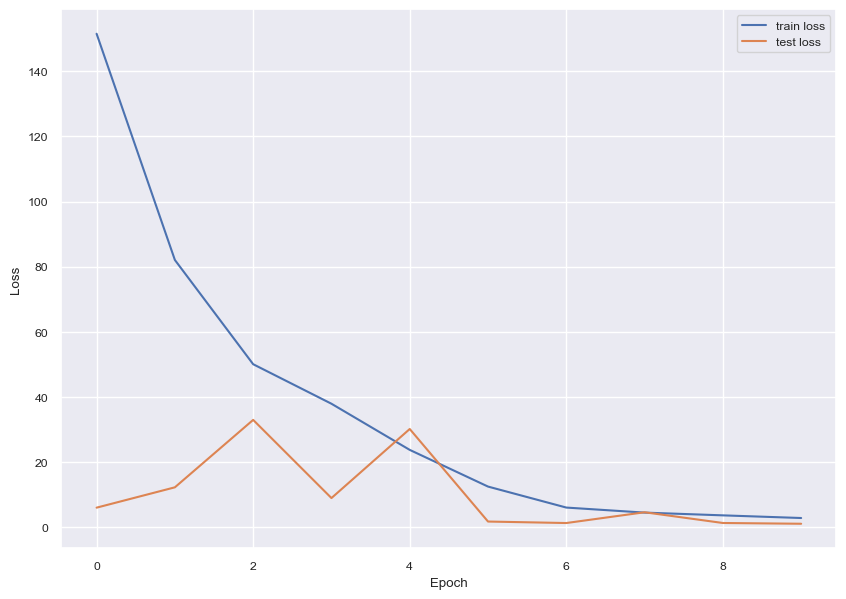

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
model.evaluate(X_test, y_test)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - loss: 1.0968 - mse: 1.0968


[1.0707050561904907, 1.0707050561904907]